In [2]:
!pip install mpld3
!pip install geopandas
!pip install wget
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()

     |████████████████████████████████| 890kB 6.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=d7c5172f570b2a0b277cd8949948192ac64ae5eb397582b58ac8bc1ccb8fa297
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3
     |████████████████████████████████| 1.0MB 1.8MB/s 
     |████████████████████████████████| 6.5MB 18.1MB/s 
     |████████████████████████████████| 15.3MB 243kB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=6b49221590cbc4e56b89404387a62d56b9b228a4af7db22c5bc2224d8804133a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import wget
import zipfile
import pandas as pd
import numpy as np
wget.download('https://raw.githubusercontent.com/Call-for-Code/Spot-Challenge-Wildfires/main/data/Nov_10.zip', 'Nov_10.zip')
zip_handle = zipfile.ZipFile("Nov_10.zip")
zip_handle.extractall()
file_wildfires = "/content/Nov_10/Historical_Wildfires.csv"
print("Reading file: '{}'".format(file_wildfires))
df = pd.read_csv(file_wildfires)
print("Loaded...")

df.head()
num_rows, num_cols = df.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df.columns)))
df['Date'] = pd.to_datetime(df['Date'])
print("Minimum Date: {}".format(df['Date'].min()))
print("Maximum Date: {}".format(df['Date'].max()))
df.loc[df.Std_confidence.isna(), :]
df.loc[df.Var_confidence.isna(), :]
df.loc[(df['Std_confidence'].isna()) & (df['Var_confidence'].isna()), ['Count']].drop_duplicates().reset_index(drop=True)
# distinct "Count" column values when Std_confidence and Var_confidence are NULL.
print("Distinct 'Count' column values when Std_confidence and Var_confidence are NULL.\n")
Count_values = df.loc[(df['Std_confidence'].isna()) & (df['Var_confidence'].isna()), 'Count'].values
print("'Count' Column Values: {}".format(Count_values))

import numpy as np
print("'Count' Column Unique Values: {}".format(np.unique(Count_values)))
df.loc[df['Std_confidence'].isna(), 'Std_confidence'] = 0
df.loc[df['Var_confidence'].isna(), 'Var_confidence'] = 0
region = df['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions for Historical Wildfires:\n\n{}".format(num_regions, all_regions))
# Remove Duplicates
df.drop_duplicates(inplace=True)

# Reset dataframe index
df.reset_index(drop=True, inplace=True)
# Number of records
num_rows, num_cols = df.shape
print("Total Records:\t{}".format(num_rows))
# First five rows in data
print('First five rows of the Dataset')
df.head()
# Last five rows in data
print('Last five rows of the Dataset')
df.tail()


Reading file: '/content/Nov_10/Historical_Wildfires.csv'
Loaded...
There are total 26406 records in the following 10 columns:

Region
Date
Estimated_fire_area
Mean_estimated_fire_brightness
Mean_estimated_fire_radiative_power
Mean_confidence
Std_confidence
Var_confidence
Count
Replaced
Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00
Distinct 'Count' column values when Std_confidence and Var_confidence are NULL.

'Count' Column Values: [1 1 1 ... 1 1 1]
'Count' Column Unique Values: [1]
Following are 7 unique regions for Historical Wildfires:

NSW
NT
QL
SA
TA
VI
WA
Total Records:	26406
First five rows of the Dataset
Last five rows of the Dataset


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
26401,WA,2020-10-27,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,2020-10-28,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N
26405,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N


In [6]:
file_weather = "/content/Nov_10/HistoricalWeather.csv"
print("Reading file: '{}'".format(file_weather))
df_weather = pd.read_csv(file_weather)
print("Loaded...")

df_weather.head()
num_rows, num_cols = df_weather.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_weather.columns)))
# Let rename columns names
df_weather.columns = ['Date', 'Region', 'Parameter', 'area', 'min', 'max', 'mean', '2nd_moment']
df_weather.head()
# Checking data types of each columns
df_weather.dtypes
# Converting "Date" column to date type
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
print("Minimum Date: {}".format(df_weather['Date'].min()))
print("Maximum Date: {}".format(df_weather['Date'].max()))
df_weather.isna().sum()
df_weather.head(5)
df_pivot = df_weather.pivot_table(values=['min','max','mean','2nd_moment'], index=['Date','Region', 'area'], columns=['Parameter'])
df_pivot
# Reset dataframe index
df_pivot.reset_index(inplace=True)
df_pivot.head()
# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]
df_pivot.head()
# Rearranging Data and column
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_data = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data.head()
weather_data.isna().sum()
weather_data = weather_data.fillna(0).copy()
weather_data.head()
# Number of records
num_rows, num_cols = weather_data.shape
print("Total Records:\t{}".format(num_rows))
weather_data.head()
wildfire_weather_data = df.merge(weather_data, how='left', on=['Date', 'Region'])
wildfire_weather_data.head()

Reading file: '/content/Nov_10/HistoricalWeather.csv'
Loaded...
There are total 242781 records in the following 8 columns:

Date
Region
Parameter
count()[unit: km^2]
min()
max()
mean()
variance()
Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00
Total Records:	40481


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,RelativeHumidity_min,SoilWaterContent_2nd_moment,SoilWaterContent_max,SoilWaterContent_mean,SoilWaterContent_min,SolarRadiation_2nd_moment,SolarRadiation_max,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,800234.348986,17.383363,22.842566,2.808620,0.0,267.158378,90.332771,57.095628,31.279930,0.009965,0.444927,0.214293,0.022578,40.255460,33.214062,22.617291,7.576938,9.455474,28.945488,23.055527,12.495799,1.494301,7.364222,4.841764,1.401951
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,800234.348986,0.273471,7.657155,0.157935,0.0,195.639724,88.623436,47.170735,24.466665,0.009483,0.442955,0.203951,0.019950,29.763055,33.554867,28.076835,14.087289,13.352380,29.510120,22.425765,9.611800,1.043316,7.091141,4.014080,1.011328
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,800234.348986,4.634465,27.616505,0.434833,0.0,213.300558,92.850960,39.874638,21.705952,0.008750,0.431879,0.193668,0.020037,22.667707,34.075787,30.561703,12.310518,11.764178,26.982698,20.621405,9.024039,1.953685,9.905821,4.477879,0.930842
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,800234.348986,0.038927,3.839235,0.064224,0.0,245.624576,79.103134,39.279410,16.215517,0.007799,0.418513,0.183778,0.018115,6.949267,34.019218,32.143718,16.044561,7.940373,24.752069,19.632722,8.691216,1.102751,10.446799,4.017578,1.601724
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,800234.348986,0.236269,2.866673,0.203352,0.0,342.996833,83.001541,42.400824,14.008522,0.007482,0.413370,0.175935,0.014398,27.822830,33.265091,29.347715,15.209880,12.063971,26.472469,21.477315,10.821342,0.774612,6.671862,3.884550,1.167861


In [10]:

file_weather_forcasts = "/content/Nov_10/HistoricalWeatherForecasts.csv"
print("Reading file: '{}'".format(file_weather_forcasts))
df_forcasts = pd.read_csv(file_weather_forcasts)
print("Loaded...")

# First Five rows
df_forcasts.head()
# Checking data types of each columns
df_forcasts.dtypes
# Converting "Date" column to date type
df_forcasts['Date'] = pd.to_datetime(df_forcasts['Date'])
print("Minimum Date: {}".format(df_forcasts['Date'].min()))
print("Maximum Date: {}".format(df_forcasts['Date'].max()))
df_forcasts.head()
num_rows, num_cols = df_forcasts.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_forcasts.columns)))
# Let rename columns names
df_forcasts.columns = ['Date', 'Region', 'Parameter', 'Lead time', 'area', 'min_forcast', 'max_forcast', 'mean_forcast', '2nd_moment_forcast']
df_forcasts.head()
df_forcasts.isna().sum()
region = df_forcasts['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Forcasts data:\n\n{}".format(num_regions, all_regions))
df_forcasts.loc[(df_forcasts['Date'] == '2017-10-06') &
                (df_forcasts['Lead time'] == 15) &
                ((df_forcasts['Parameter'] == 'Precipitation')), :]
df_forcasts.drop(df_forcasts.index[(df_forcasts['Date'] == '2017-10-06') &
                                    (df_forcasts['Lead time'] == 15) &
                                    ((df_forcasts['Parameter'] == 'Precipitation'))], inplace=True)
num_rows, num_cols = df_forcasts.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_forcasts.columns)))
df_pivot = df_forcasts.pivot_table(values=['min_forcast', 'max_forcast', 'mean_forcast', '2nd_moment_forcast'], index=['Date', 'Region', 'Lead time', 'area'], columns=['Parameter'])
df_pivot
# Reset dataframe index
df_pivot.reset_index(inplace=True)
df_pivot.head()
# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]
df_pivot.head()
# Rearranging Data and column
params = df_pivot.columns.tolist()[4:]
params.sort()
weather_forcasts_data = df_pivot[df_pivot.columns.tolist()[:4] + params].copy()
weather_forcasts_data.head()
num_rows, num_cols = weather_forcasts_data.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(weather_forcasts_data.columns)))
region = weather_forcasts_data['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Data:\n\n{}".format(num_regions, all_regions))
weather_forcasts_data.isna().sum()
weather_forcasts_data.isna().sum()
weather_forcasts_data = weather_forcasts_data.fillna(0).copy()
weather_forcasts_data.head()
# First five rows in data
weather_forcasts_data.head()
wildfire_weather_data.head()
weather_data[['Region','area']].round(0).drop_duplicates().sort_values(by=['Region','area']).reset_index(drop=True)
weather_forcasts_data[['Region','area']].round(0).drop_duplicates().sort_values(by=['Region','area']).reset_index(drop=True)
weather_forcasts_data.drop('area', axis=1, inplace=True)

# Remove Duplicates
weather_forcasts_data.drop_duplicates(inplace=True)

# Reset dataframe index
weather_forcasts_data.reset_index(drop=True, inplace=True)

# Number of records
num_rows, num_cols = weather_forcasts_data.shape
print("Total Records:\t{}".format(num_rows))
weather_forcasts_data.head()
df_fires_weather_forcasts = wildfire_weather_data.merge(weather_forcasts_data, how='left', on=['Date', 'Region'])

# Number of records
num_rows, num_cols = df_fires_weather_forcasts.shape
print("Total Records:\t{}".format(num_rows))

df_fires_weather_forcasts.head()

Reading file: '/content/Nov_10/HistoricalWeatherForecasts.csv'
Loaded...
Minimum Date: 2014-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00
There are total 217212 records in the following 9 columns:

Date
Region
Parameter
Lead time
count()[unit: km^2]
min()
max()
mean()
variance()
Following are 7 unique regions in Historical Weather Forcasts data:

NSW
NT
QL
SA
TA
VI
WA
There are total 217205 records in the following 9 columns:

Date
Region
Parameter
Lead time
area
min_forcast
max_forcast
mean_forcast
2nd_moment_forcast
There are total 44620 records in the following 24 columns:

Date
Region
Lead time
area
Precipitation_2nd_moment_forcast
Precipitation_max_forcast
Precipitation_mean_forcast
Precipitation_min_forcast
RelativeHumidity_2nd_moment_forcast
RelativeHumidity_max_forcast
RelativeHumidity_mean_forcast
RelativeHumidity_min_forcast
SolarRadiation_2nd_moment_forcast
SolarRadiation_max_forcast
SolarRadiation_mean_forcast
SolarRadiation_min_forcast
Temperature_2nd_moment_forcast
Tem

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,RelativeHumidity_min,SoilWaterContent_2nd_moment,SoilWaterContent_max,SoilWaterContent_mean,SoilWaterContent_min,SolarRadiation_2nd_moment,SolarRadiation_max,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min,Lead time,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,RelativeHumidity_min_forcast,SolarRadiation_2nd_moment_forcast,SolarRadiation_max_forcast,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,800234.348986,17.383363,22.842566,2.808620,0.0,267.158378,90.332771,57.095628,31.279930,0.009965,0.444927,0.214293,0.022578,40.255460,33.214062,22.617291,7.576938,9.455474,28.945488,23.055527,12.495799,1.494301,7.364222,4.841764,1.401951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,800234.348986,0.273471,7.657155,0.157935,0.0,195.639724,88.623436,47.170735,24.466665,0.009483,0.442955,0.203951,0.019950,29.763055,33.554867,28.076835,14.087289,13.352380,29.510120,22.425765,9.611800,1.043316,7.091141,4.014080,1.011328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,800234.348986,4.634465,27.616505,0.434833,0.0,213.300558,92.850960,39.874638,21.705952,0.008750,0.431879,0.193668,0.020037,22.667707,34.075787,30.561703,12.310518,11.764178,26.982698,20.621405,9.024039,1.953685,9.905821,4.477879,0.930842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,800234.348986,0.038927,3.839235,0.064224,0.0,245.624576,79.103134,39.279410,16.215517,0.007799,0.418513,0.183778,0.018115,6.949267,34.019218,32.143718,16.044561,7.940373,24.752069,19.632722,8.691216,1.102751,10.446799,4.017578,1.601724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,800234.348986,0.236269,2.866673,0.203352,0.0,342.996833,83.001541,42.400824,14.008522,0.007482,0.413370,0.175935,0.014398,27.822830,33.265091,29.347715,15.209880,12.063971,26.472469,21.477315,10.821342,0.774612,6.671862,3.884550,1.167861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

# Number of records
num_rows, num_cols = wildfire_weather_data.shape
print("Total Records:\t{}".format(num_rows))

wildfire_weather_data.head()
# First 25 rows
df_fires_weather_forcasts.head()
# Last 25 rows
df_fires_weather_forcasts.tail()
df_analysis = df_fires_weather_forcasts.loc[df_fires_weather_forcasts['Date'] >= df_forcasts['Date'].min(), :].copy()
df_analysis.reset_index(drop=True, inplace=True)
df_analysis.sort_values(by=['Region', 'Date'], inplace=True)
num_rows, num_cols = df_analysis.shape
print("There are total {} records.".format(num_rows))
df_analysis.head()
df_analysis.isna().sum()
df_analysis.loc[df_analysis['Lead time'].isna(), :]
df_forcasts.loc[df_forcasts['Date'] == '2014-02-11', :]
df_analysis = df_analysis.fillna(0).copy()
df_analysis.head()
# First 10 rows
df_analysis.head(10)

# Last 10 rows
df_analysis.tail(10)

# Remove Duplicates
df_analysis.drop_duplicates(inplace=True)
# Reset dataframe index
df_analysis.reset_index(drop=True, inplace=True)

# counts of data
num_rows, num_cols = df_analysis.shape
print("Total Records:\t{}".format(num_rows))

df_analysis


Total Records:	26406
There are total 29513 records.
Total Records:	29513


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,RelativeHumidity_min,SoilWaterContent_2nd_moment,SoilWaterContent_max,SoilWaterContent_mean,SoilWaterContent_min,SolarRadiation_2nd_moment,SolarRadiation_max,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min,Lead time,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,RelativeHumidity_min_forcast,SolarRadiation_2nd_moment_forcast,SolarRadiation_max_forcast,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2014-01-01,3.000000,321.216667,49.966667,91.000000,9.000000,81.000000,3,R,8.002343e+05,0.863342,9.937579,0.265846,0.0,333.885564,79.022217,29.406773,5.392131,0.005384,0.395134,0.158274,0.019970,29.413656,33.023735,25.359682,10.209308,20.852856,36.733120,29.204838,15.001056,0.905107,7.158378,3.315765,1.443099,5.0,0.000000,0.000000,0.000000,0.0,353.620815,85.021118,28.223569,7.482927,2.276068,33.557598,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,NSW,2014-01-03,74.017209,320.410465,70.576744,93.720930,7.935231,62.967885,43,R,8.002343e+05,0.144674,5.758216,0.073854,0.0,210.495760,86.980263,39.524400,20.905491,0.005003,0.373180,0.158068,0.015274,16.622540,32.813232,28.829655,10.752694,26.106675,37.429436,27.243161,14.352208,3.444776,9.458820,5.876960,1.193741,5.0,0.000000,0.000000,0.000000,0.0,170.653427,85.432808,40.073863,23.991610,22.217494,32.385204,24.660504,11.779593,16.553366,36.304554,28.740031,15.639575,6.354403,10.795617,5.696997,1.511390
2,NSW,2014-01-04,102.937500,318.631250,119.006250,88.750000,7.812315,61.032258,32,R,8.002343e+05,0.529201,8.233716,0.203949,0.0,242.355317,85.014107,36.911058,17.175438,0.004785,0.368093,0.158421,0.013447,4.722852,35.361897,32.490868,22.398932,9.803275,29.464725,21.937499,11.040587,0.346670,6.986681,3.403316,1.010101,5.0,0.000000,0.000000,0.000000,0.0,244.922272,79.544380,40.334391,20.122776,4.588158,34.926014,32.975682,20.678528,13.024237,32.729553,23.613320,11.868508,1.689959,8.223342,4.260682,1.277267
3,NSW,2014-01-05,85.902143,322.239286,63.289286,91.910714,8.334543,69.464610,56,R,8.002343e+05,0.012752,1.167259,0.026990,0.0,188.056432,87.084251,33.399606,13.353286,0.004688,0.368698,0.156968,0.013399,3.590490,34.314144,32.537030,22.115858,8.866025,30.507725,24.005203,12.800094,2.682194,9.250876,4.769847,1.486771,5.0,0.000000,0.000000,0.000000,0.0,317.980265,90.869308,39.400439,15.113902,18.756798,35.354248,32.435075,8.228070,10.446423,29.856218,22.985766,12.450391,2.615668,7.229513,3.967104,1.000668
4,NSW,2014-01-06,145.659508,319.965574,108.895082,91.426230,7.497686,56.215301,61,R,8.002343e+05,0.776193,19.074488,0.217616,0.0,175.041130,85.099205,34.221669,14.930017,0.004361,0.359561,0.154590,0.013603,3.088409,34.386532,32.598590,22.055305,11.400644,28.891266,20.816013,9.831650,1.901058,11.577413,5.118724,1.500215,5.0,0.000000,0.000000,0.000000,0.0,259.725407,82.868942,38.060055,18.354837,3.606655,35.469028,33.590963,21.573400,12.428537,29.237406,20.960910,9.444987,3.398943,8.868293,4.961131,1.604553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29508,WA,2020

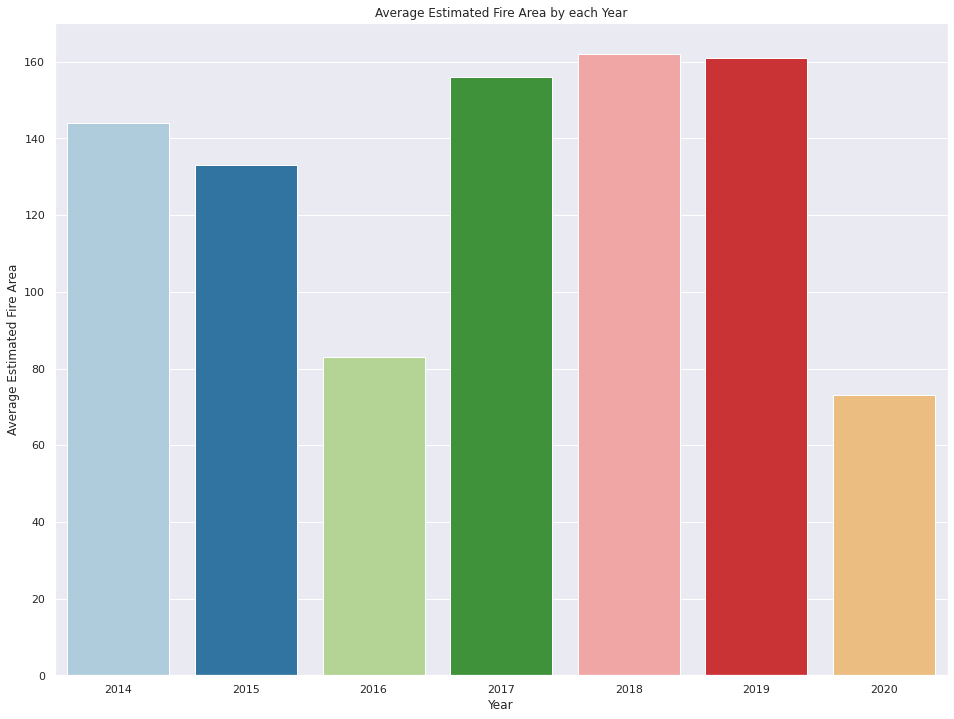

In [12]:

# Estimated Fire in Dates, Region Analysis
fire_areas = df_analysis[['Region', 'Date', 'Estimated_fire_area']].copy()
fire_areas = fire_areas.drop_duplicates().sort_values(by=['Date']).reset_index(drop=True)
fire_areas['year'] = fire_areas['Date'].dt.year
fire_areas['month'] = fire_areas['Date'].dt.month

fire_year = fire_areas.groupby('year')[['Estimated_fire_area']].mean().round().reset_index()

plt.figure(figsize=(16, 12))
colors = sns.color_palette("Paired", 7)

fig = sns.barplot(x="year", y="Estimated_fire_area", data=fire_year, palette=colors)
fig.set_title('Average Estimated Fire Area by each Year')
fig.set(xlabel='Year', ylabel='Average Estimated Fire Area')
plt.show()